In [1]:
import pixiedust 
import sklearn 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost

Pixiedust database opened successfully


In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [3]:
df=pixiedust.sampleData('https://raw.githubusercontent.com/happyheng11/Heart_disease_proj/main/preprocessed_heart.csv')

Downloaded 67790 bytes
Creating pandas DataFrame for 'https://raw.githubusercontent.com/happyheng11/Heart_disease_proj/main/preprocessed_heart.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://raw.githubusercontent.com/happyheng11/Heart_disease_proj/main/preprocessed_heart.csv'



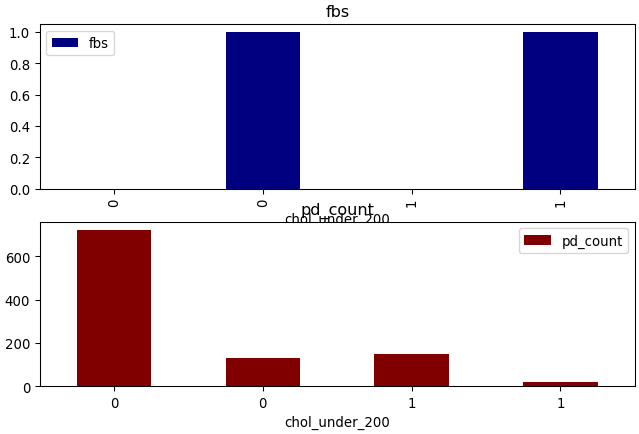

In [ ]:
display(df)

In [5]:
path = 'https://raw.githubusercontent.com/happyheng11/Heart_disease_proj/main/preprocessed_heart.csv'
df1 = pd.read_csv(path) 
print(df1)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      ...  ca  thal  target       age group cp_True  trestbps_under_130   \

<AxesSubplot:xlabel='age', ylabel='Count'>

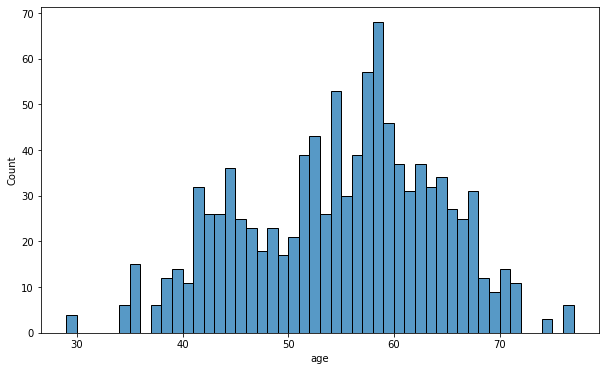

In [6]:
# using seaborn to plot histogram for diff attributes - such as 'age' etc
plt.figure(figsize = (10,6))
sns.histplot(df1['age'], binwidth = 1)

In [11]:
# make copy of df for modification
dfcopy = df.copy()

# remove target as y matrix from the dfcopy dataframe
y = dfcopy.pop('target')

# make remaining matrix as X
X = dfcopy

In [12]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [13]:
print(X.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal       age group  cp_True  trestbps_under_130   chol_under_200  \
0   2     3  50_TO_UNDER_60        0                    1               0   
1   0     3  50_TO_UNDER_60        0                    0               0   
2   0     3      70_&_ABOVE        0                    0               1   
3   1     3  60_TO_UNDER_70        0                    0               0   
4   3     2  60_TO_UNDER_70        0                    0               0   

   chol_bps_fbs_HIGH  max_healthyHR  thalach_under

In [14]:
print(y.shape)

(1025,)


In [15]:
print(X.shape)

(1025, 20)


In [16]:
# look at the types for the diff columns
X.dtypes

age                            int64
sex                            int64
cp                             int64
trestbps                       int64
chol                           int64
fbs                            int64
restecg                        int64
thalach                        int64
exang                          int64
oldpeak                      float64
slope                          int64
ca                             int64
thal                           int64
age group                     object
cp_True                        int64
trestbps_under_130             int64
chol_under_200                 int64
chol_bps_fbs_HIGH              int64
max_healthyHR                  int64
thalach_under_maxhealthHR      int64
dtype: object

In [17]:
# perform scaling / normalization / standardization via running this cell, as necessary 

# min-max scaling:

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'max_healthyHR']] = mms.fit_transform(X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'max_healthyHR']])

In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age group,cp_True,trestbps_under_130,chol_under_200,chol_bps_fbs_HIGH,max_healthyHR,thalach_under_maxhealthHR
0,0.479167,1,0,0.292453,0.196347,0,1,0.740458,0,0.161290,1.0,0.50,1.000000,50_TO_UNDER_60,0,1,0,0,0.520833,1
1,0.500000,1,0,0.433962,0.175799,1,0,0.641221,1,0.500000,0.0,0.00,1.000000,50_TO_UNDER_60,0,0,0,1,0.500000,1
2,0.854167,1,0,0.481132,0.109589,0,1,0.412214,1,0.419355,0.0,0.00,1.000000,70_&_ABOVE,0,0,1,0,0.145833,1
3,0.666667,1,0,0.509434,0.175799,0,1,0.687023,0,0.000000,1.0,0.25,1.000000,60_TO_UNDER_70,0,0,0,0,0.333333,0
4,0.687500,0,0,0.415094,0.383562,1,1,0.267176,0,0.306452,0.5,0.75,0.666667,60_TO_UNDER_70,0,0,0,1,0.312500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1,1,0.433962,0.216895,0,1,0.709924,1,0.000000,1.0,0.00,0.666667,50_TO_UNDER_60,1,0,0,0,0.375000,0
1021,0.645833,1,0,0.292453,0.301370,0,0,0.534351,1,0.451613,0.5,0.25,1.000000,60_TO_UNDER_70,0,1,0,0,0.354167,1
1022,0.375000,1,0,0.150943,0.340183,0,0,0.358779,1,0.161290,0.5,0.25,0.666667,40_TO_UNDER_50,0,1,0,0,0.625000,1
1023,0.437500,0,0,0.150943,0.292237,0,0,0.671756,0,0.000000,1.0,0.00,0.666667,50_TO_UNDER_60,0,1,0,0,0.562500,1


In [19]:
# split train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

           age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
315   0.270833    1   3  0.509434  0.269406    0        0  0.816794      0   
204   0.770833    0   2  0.490566  0.347032    0        0  0.618321      0   
363   0.500000    1   2  0.339623  0.273973    1        0  0.778626      0   
5     0.604167    0   0  0.056604  0.278539    0        0  0.389313      0   
1017  0.500000    1   0  0.273585  0.356164    0        1  0.183206      1   
...        ...  ...  ..       ...       ...  ...      ...       ...    ...   
835   0.416667    1   2  0.226415  0.052511    0        0  0.419847      0   
192   0.791667    0   2  0.198113  1.000000    0        0  0.679389      0   
629   0.750000    1   3  0.415094  0.356164    1        0  0.786260      0   
559   0.791667    1   0  0.245283  0.253425    0        1  0.000000      0   
684   0.645833    1   2  0.433962  0.134703    0        0  0.641221      0   

       oldpeak  slope    ca      thal       age group  cp_True 

In [21]:
# select the columns that you want in the transformed_Xtrain and transformed_Xtest
transformed_Xtrain = X_train[['chol_bps_fbs_HIGH']]
transformed_Xtest = X_test[['chol_bps_fbs_HIGH']]

print(transformed_Xtrain)
print(transformed_Xtest)

      chol_bps_fbs_HIGH
315                   0
204                   0
363                   1
5                     0
1017                  0
...                 ...
835                   0
192                   0
629                   1
559                   0
684                   0

[820 rows x 1 columns]
     chol_bps_fbs_HIGH
807                  0
27                   1
77                   0
406                  1
886                  0
..                 ...
877                  0
320                  0
362                  0
452                  1
500                  0

[205 rows x 1 columns]


In [22]:
# select the type of model
# Uncomment the lines of code for the model that you want to select

from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

'''
# XGBoost Regressor (for regression use - ie. quantitative)
#model = XGBRegressor()
'''
# XGBoost Classifier
model = XGBClassifier()

'''
# Random Forest Classifier
#model = RandomForestClassifier()

# Random Forest Regressor (for regression use - ie. quantitative)
#model = RandomForestRegressor()

# SVC
#model = svm.SVC()

# K Nearest Neighbors Classifier 
#model = KNeighborsClassifier(n_neighbors=1)

# Logistic Regression
#model = LogisticRegression()

# for single feature in transformed_X, it needs to be reshaped for the model to work
#transformed_Xtrain = transformed_Xtrain.values.reshape(-1,1)
#transformed_Xtest = transformed_Xtest.values.reshape(-1,1)
'''


model.fit(transformed_Xtrain, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [26]:
y_pred = model.predict(transformed_Xtest)
print(y_pred)
print(y_pred.shape)

[1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1]
(205,)


In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [28]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result']) 

[[ 12  86]
 [  6 101]]


Predicted Result,0,1
Actual Result,,
0,12,86
1,6,101


In [29]:
# accuracy
accuracy_score(y_test, y_pred)

0.551219512195122

In [30]:
# precision
precision_score(y_test, y_pred)

0.5401069518716578

In [31]:
# recall
recall_score(y_test, y_pred)

0.9439252336448598

In [32]:
# f1 score
f1_score(y_test, y_pred)

0.6870748299319728

In [33]:
# roc_auc_score
roc_auc_score(y_test, y_pred)

0.5331871066183482

In [34]:
# mean squared error
mean_squared_error(y_test, y_pred)

0.44878048780487806

In [35]:
# mean absolute error
mean_absolute_error(y_test, y_pred)

0.44878048780487806